# Test vectorization, rasterization tools

In [1]:
import vectorization_tools, rasterization_tools
from keras.layers import Input
import numpy as np
# from scipy.io import loadmat
from matplotlib import pyplot as plt
%matplotlib inline
import ModelA
import h5py
from config import DATASET

img_rows, img_cols = 32, 32
img_chn = 3

2024-07-11 13:30:32.956431: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-11 13:30:32.987189: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-11 13:30:33.439444: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
# Load the dataset.
hf = h5py.File(DATASET, 'r')
x_test = hf.get('xn')
x_test = np.array(x_test)
y_test = hf.get('yn')
y_test = np.array(y_test)


In [3]:
print(x_test.shape)

(2247, 32, 32, 3)


Text(0.5, 1.0, 'original image')

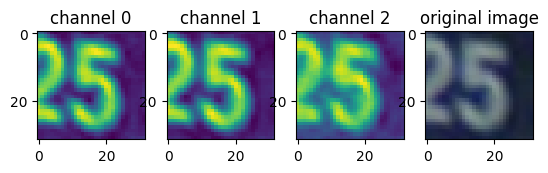

In [10]:
# Normalize data.
#x_test = np.moveaxis(x_test, -1, 0)
#x_test = x_test.astype('float32') / 255

#y_test[y_test == 10] = 0
#y_test = np.array(y_test)

# 22 is critical
index = 12
seed_image = x_test[index]
explabel = y_test[index]
#seed_image = x_test[5]
fig, axs = plt.subplots(1,4)
for channel in range(seed_image.shape[2]):
    channel_img = seed_image[...,channel]
    # plt.imsave("channel"+str(channel)+".png", channel_img, cmap='gray')
    axs[channel].imshow(channel_img)
    axs[channel].set_title(f"channel {channel}")
#plt.imsave("channel_original.png", seed_image, cmap='gray')
axs[3].imshow(seed_image)
axs[3].set_title(f"original image")
#grey = np.mean(seed_image, axis=2)
#plt.imsave("channel_mean.png", grey, cmap='gray')

(1, 32, 32, 3)


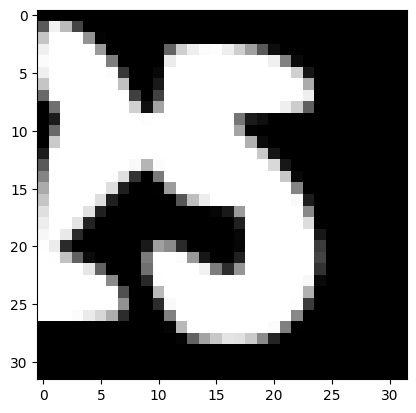

In [11]:
xml_desc = vectorization_tools.vectorize(seed_image)

with open ("channel_svg.svg", 'w') as file:
    file.write(xml_desc)

rasterized = rasterization_tools.rasterize_in_memory(xml_desc)

print(rasterized.shape)
plt.imshow(rasterized[0])

(1, 32, 32, 3)
model_1
1/1 [==============================] - 0s 127ms/step
expected label: 5
predicted label: 5
(32, 32, 3)


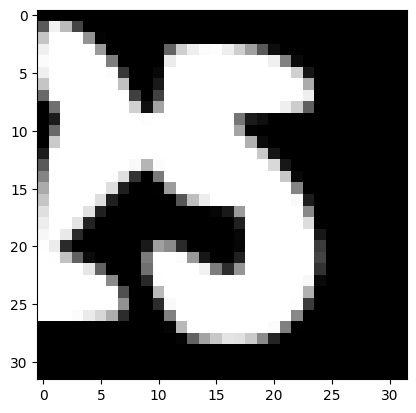

In [12]:
color_rasterized = rasterized
print(color_rasterized.shape)

input_shape = (img_rows, img_cols, img_chn)

# define input tensor as a placeholder
input_tensor = Input(shape=input_shape)

model1 = ModelA.ModelA(input_tensor)
print(model1.name)

pred1 = model1.predict(color_rasterized)
label1 = np.argmax(pred1[0])
print("expected label: " + str(explabel))
print("predicted label: "+str(label1))


v = color_rasterized * 255.0
v = v.astype('uint8')
v = v.reshape(32, 32, 3)
# plt.imsave("channel_mean_vectorized.png", v, cmap='gray')
plt.imshow(v)
print(v.shape)